<a href="https://colab.research.google.com/github/Min-Thway-Htut/B104-Final-Assignment/blob/master/B104_final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment
###  Artifical Intelligence & Machine Learning

by

Min Thway Htut - GH1023126




## Problem Statement

### Which factors led students to drop out of school?

The main purpose of this machine learning pipeline is to explore the relationship between student dropout rate and the factors that make it happen.

It is very important to understand this matter as education plays a vital role in every country. Additionally, high dropout rates can lead to economic decline, increased crime, poor health, and so on.

## Data collection

A related dataset was collected on Kaggle website. Please follow the link below to see the dataset.



In [33]:
import pandas as pd
import sklearn.model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.compose
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

As a first step, necessary libraries for the pipeline are imported.

In [2]:
df = pd.read_csv('/content/student dropout.csv')
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print("df size", df.shape)
print("df train size", df_train.shape)
print("df test size", df_test.shape)

df size (649, 34)
df train size (486, 34)
df test size (163, 34)


Before working on the other steps, the data is split into train data and test data(75% for the train data and 25% for the test data).

## Data Exploration

In [4]:
df_train.dtypes

,0
School,object
Gender,object
Age,int64
Address,object
Family_Size,object
Parental_Status,object
Mother_Education,int64
Father_Education,int64
Mother_Job,object
Father_Job,object


We find out that our dataset consists of different data type such as int64, float, and boolean.

In [5]:
df.isnull().sum()

,0
School,0
Gender,0
Age,0
Address,0
Family_Size,0
Parental_Status,0
Mother_Education,0
Father_Education,0
Mother_Job,0
Father_Job,0


It is important to check if there were any missing value or null value in each column.
In this case, there is no missing value in our dataset.

<Axes: >

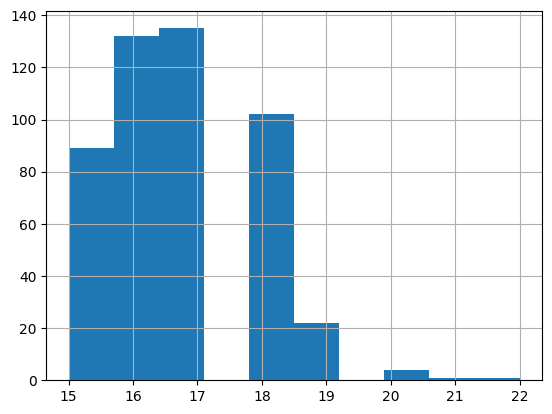

In [6]:
df_train["Age"].hist()

According to the generated figure, the age varies from 15 to 22.

<Axes: xlabel='Gender'>

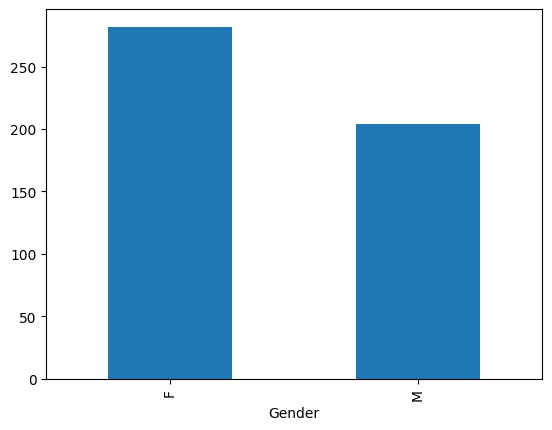

In [7]:
df_train["Gender"].value_counts().plot(kind="bar")

There are 279 females and 207 male in our train dataset.

<Axes: xlabel='Dropped_Out'>

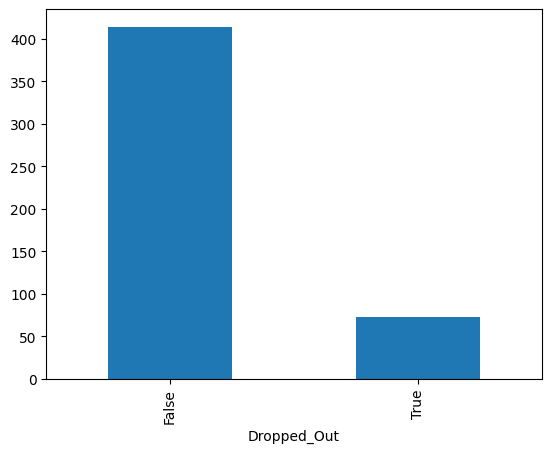

In [8]:
df_train["Dropped_Out"].value_counts().plot(kind="bar")

This figure suggests that our target variable suffers a class imbalance,
necessitating a particular sampling method.

## Data Preprocessing

In [9]:
x_train = df_train.drop(["Dropped_Out"], axis=1)
y_train = df_train["Dropped_Out"]
x_test = df_test.drop(["Dropped_Out"], axis=1)
y_test = df_test["Dropped_Out"]

print("x_train size:", x_train.shape)
print("y_test size:",y_train.shape)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)

x_train size: (486, 33)
y_test size: (486,)
x_train size: (486, 33)
y_train size: (486,)


We seperate features and target variables for training and testing variables.

In [10]:
x_train_encoded = pd.get_dummies(x_train, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

Using one-hot encoding, we convert categorical variables of the train dataset and test dataset into numercial ones.

In [11]:
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

After that, we make sure that both train and test sets have the same columns

In [12]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_encoded, y_train)

In [13]:
print("Resampled class distribution in y_train:")
print(y_train_resampled.value_counts())

Resampled class distribution in y_train:
Dropped_Out
True     414
False    414
Name: count, dtype: int64


As a result, our target variables are balanced finally.

## Feature Engineering

In [14]:
categorical_attributes = x_train.select_dtypes(["object"]).columns
numerical_attributes = x_train.select_dtypes(["int64"], "float64").columns

ct = sklearn.compose.ColumnTransformer([
    ("one-encoder",sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore"), categorical_attributes),
   ("scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes )
])
ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print("x_train size:", x_train.shape)
print("x_test size:", x_test.shape)

x_train size: (486, 59)
x_test size: (163, 59)


We differentiate categorical and numerical columns, targeting "object" data type for the categorical attributes and "int64" and "float64" data types for the numerical attributes.

In this case, ColumnTrasnformer is used to apply transformations to columns of the dataset. We use OneHotEncoder to convert categorical variables into binary columns while StandardScaler is used for the numerical features.

## Model Training

In [34]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

To choose the optimal algorithm, we train our model using three different algorithms (Logistic Regression, Random Forest, and Support Vector Machine0).

In [35]:
param_grid = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'Support Vector Machine': {
        'classifier__C': [0.1,1,10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'Logistic Regression': {
        'classifier__C':[0.1,1,10]
    }
}

best_models = {}

## Model Training

And then, their respective hyper parameters are tuned and a dictionary is created to store these hyper parameters.

In [46]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'classifier__C': 10}
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best parameters for Support Vector Machine: {'classifier__C': 1, 'classifier__kernel': 'linear'}


To figure out the best possible parameter based on the accuracy, the cross-validation method is applied for each machine learning model.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy}, F1 Score: {f1}")

Support Vector Machine - Accuracy: 0.9570552147239264, F1 Score: 0.8679245283018868
Logistic Regression - Accuracy: 0.9631901840490797, F1 Score: 0.8888888888888888
Random Forest - Accuracy: 1.0, F1 Score: 1.0


We get the result for each algorithm. Out of three algorithms, we observe that Random Forest performs the best as it has the perfect accuracy compared to other algorithms (around 95% for Support Vector Machine and 96% for the Logistic Regression).

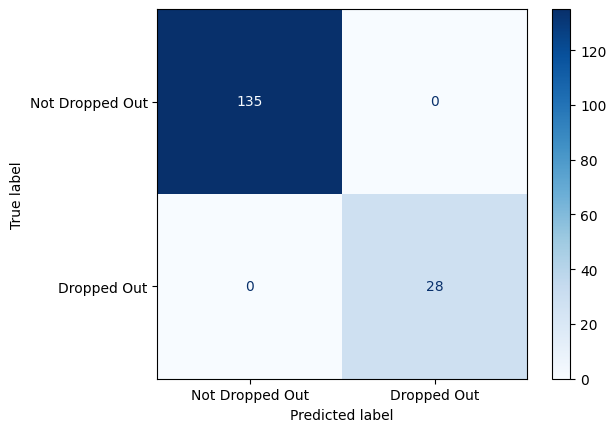

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Dropped Out', 'Dropped Out'])
disp.plot(cmap='Blues')


According to the generated Confusion Matrix, we can assume that our model is performing very well as we see the value 0 for the False Positive and False Negative.

 However, there are still certain limitations such as overfitting issues on the Random Forest Algorithm.

## Summary

Overall, the pipeline can predict the dropout cases with high accuarcy and performance (100% accuracy, 0 false positives and 0 false negatives), indicating reliable predictions of student dropouts.

However, there can still be limitations of the pipeline such as the risk of overfitting. This is why further validation on unseen dataset is recommended.

Additionally, we learn that our model has some informative features also. For example, parental status, family size, the number of absences and social engagement such as weekend activities and free time can encourage students to drop out of school.

Thanks to the model's ability to accurately predict the student dropouts, educational organizations can make informed decision-making as well as dictate suitable policies to improve educational outcomes and institutional reputations.

### Recommendations

**Early Interventions Program**

Based on our predicted model, the educational organizations should work on early interventions programs for the students who are at-risk of dropping out. For example, the idea of implementing academic counseling and personal mentoring can be helpful to motivate those students.


**Expand Data Collection and Regular Model Update**

As there can be other features that influence our target variable, it is recommended to enhance data collection efforts. Last but not least, we should also use new data to keep our model updated, maintaining its accuracy.
